In [1]:
import numpy as np
import fmin_2dpso as f2pso
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def rastrigin2d(rvec,A=10.):
    ndim  = len(rvec)
    const = A * ndim
    tosum = rvec**2. - A*np.cos(2*np.pi*rvec)
    return const + tosum.sum()
# end def

In [9]:
nx   = 100
xmin = -5.12
xmax = 5.12

pop_size = 20
ndim = 2
max_hop = 0.2
c1 = 1
c2 = 1

max_it = 10

In [10]:
global_best_trace = np.array([])
pso = f2pso.PSOMin2D(rastrigin2d,xmin,xmax,max_hop,pop_size,c1,c2)

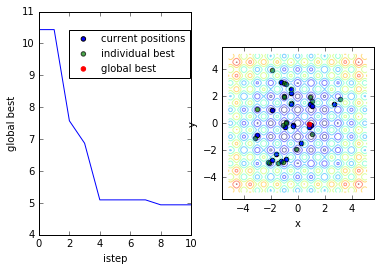

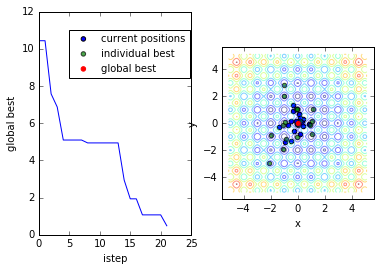

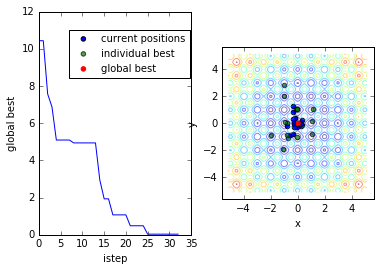

In [11]:
for isnap in range(3):

    trace = pso.run_nsteps(max_it)
    global_best_trace = np.append(global_best_trace,trace)

    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel("istep")
    ax1.set_ylabel("global best")
    ax1.plot(global_best_trace)

    ax2 = fig.add_subplot(122,aspect=1)
    ax2.set_xlabel("x")
    ax2.set_ylabel("y")

    cs = pso.visualize(ax2)
    ax2.legend(scatterpoints = 1, fontsize = 10, loc=(-1,0.8))

    plt.savefig("step%d.png"%len(global_best_trace))
    
# end for isnap

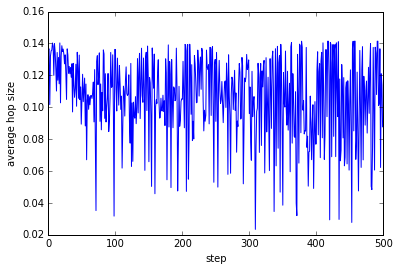

In [6]:
fig = plt.figure()
ax  = fig.add_subplot(111)

ax.set_xlabel("step")
ax.set_ylabel("average hop size")

ax.plot(pso.avg_hop)
#plt.savefig("hop_trace.png")

In [143]:
# this will take a few minutes
max_it = 100
nruns = 100
random_best = np.zeros(nruns)
pso_best = np.zeros(nruns)
nsamples = pop_size * max_it

for irun in range(nruns):
    
    random_best[irun] = np.apply_along_axis(rastrigin2d,1,(xmax-xmin)*np.random.rand(nsamples,ndim)+xmin ).min()
    
    pso = f2pso.PSOMin2D(rastrigin2d,xmin,xmax,max_hop,pop_size,c1,c2)
    trace = pso.run_nsteps(max_it)
    pso_best[irun] = trace[-1]
# end for irun

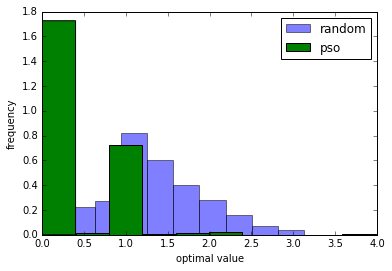

In [151]:
plt.hist(random_best,alpha=0.5,label="random",normed=True)
plt.hist(pso_best,label="pso",normed=True)
plt.xlabel("optimal value")
plt.ylabel("frequency")
plt.legend()
plt.savefig("hist.png")